<a href="https://colab.research.google.com/github/ayushjain1144/Active-Learning/blob/master/Diversity_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install modAL

In [0]:
import numpy as np
from sklearn import datasets
from sklearn import decomposition

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import classifier_uncertainty
from modAL.models import ActiveLearner


In [0]:
rnd_seed = 452
np.random.seed(rnd_seed)

In [0]:
irs = datasets.load_iris()
x_pre = irs['data']
y_pre = irs['target']

In [0]:
pca = decomposition.PCA(n_components=2, random_state=rnd_seed)
irs_trns = pca.fit_transform(X=x_pre)

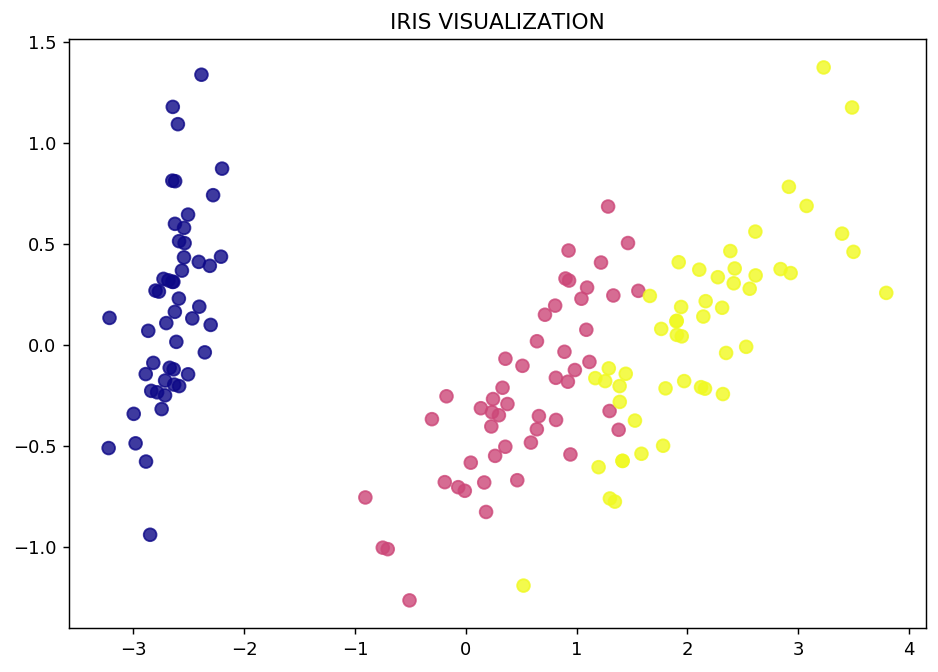

In [82]:
x_c, y_c = irs_trns[:,0], irs_trns[:,1]

plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_c, y=y_c, c=y_pre, cmap='plasma', s=50, alpha=8/10)
plt.title('IRIS VISUALIZATION')
plt.show()

## Diversity Sampling: The cluster method

In [0]:
dataset_size = x_pre.shape

In [0]:
idx_training = np.random.randint(low=0,high=dataset_size[0], size=3)
x_train = x_pre[idx_training]
y_train = y_pre[idx_training]

x_pool = np.delete(x_pre, idx_training, axis=0)

y_pool = np.delete(y_pre, idx_training, axis=0)

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)

learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=x_train, y_training=y_train)
initial_score = learner.score(x_pool, y_pool)

print(f"Prediction Accuracy using only 3 samples - KNN: {initial_score}")

Prediction Accuracy using only 3 samples - KNN: 0.3333333333333333


In [86]:
# Evaluating the model's performance on the initial dataset

pred_initial = learner.predict(x_pre)
is_correct_pred = (pred_initial == y_pre)

pred_initial

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

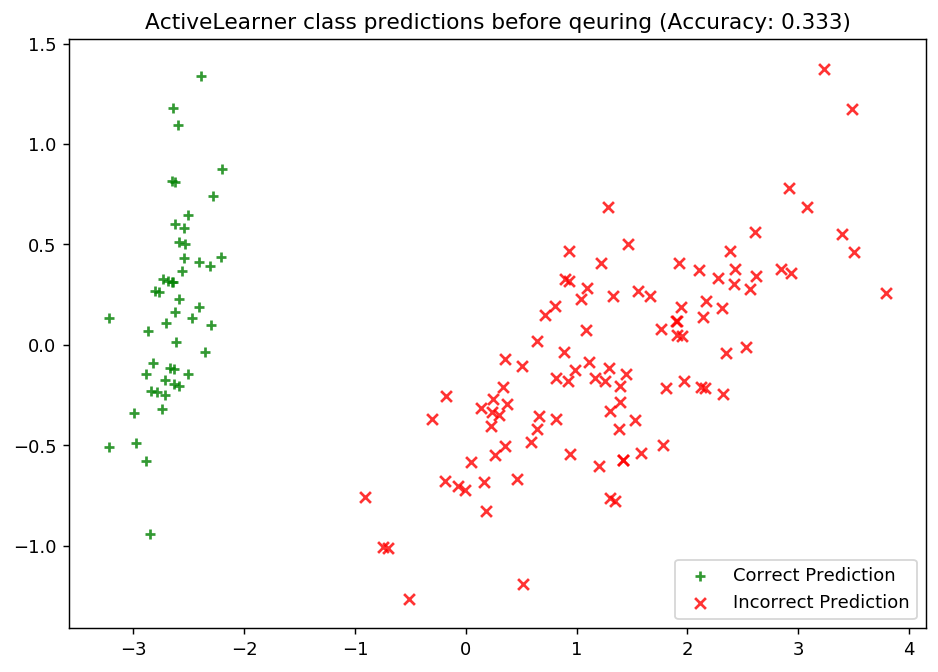

In [87]:

score_before_querying = learner.score(x_pre, y_pre)

# Plot the results

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_c[is_correct_pred],  y=y_c[is_correct_pred],  c='g', marker='+', label='Correct Prediction',   alpha=8/10)
ax.scatter(x=x_c[~is_correct_pred], y=y_c[~is_correct_pred], c='r', marker='x', label='Incorrect Prediction', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions before qeuring (Accuracy: {score:.3f})".format(score=score_before_querying))
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=20)
km = kmeans.fit(x_pre)

In [90]:
print(kmeans.cluster_centers_[0])

[6.1875 2.6    5.05   1.625 ]


In [91]:
np.where((x_pre == kmeans.cluster_centers_[0]).all(axis=1))

(array([], dtype=int64),)

In [92]:
kmeans.labels_

array([ 1,  8,  8,  8,  1, 14,  8,  1, 15,  8, 14,  8,  8, 15, 12, 12, 14,
        1, 14, 14,  1,  1,  8,  1,  8,  8,  1,  1,  1,  8,  8,  1, 14, 12,
        8,  8,  1,  1, 15,  1,  1, 15, 15,  1, 14,  8, 14,  8, 14,  1, 13,
       19, 13, 11, 13,  3, 19,  5, 13, 11,  5,  3, 11, 19, 11, 13, 16,  3,
        7, 11, 19,  7,  0, 19,  7, 13, 13, 13, 19, 11, 11, 11,  3,  0, 16,
       19, 13,  7,  3, 11,  3, 19,  3,  5,  3,  3,  3,  7,  5,  3, 18, 17,
        2,  4,  4,  6, 16,  2,  4, 18, 10,  4, 10, 17, 17, 10,  4,  9,  6,
        0, 18, 17,  6,  0, 18,  2,  0, 19,  4,  2,  2,  9,  4,  0,  0,  2,
       18,  4, 19, 10, 18, 10, 17, 18, 18, 10,  0, 10, 10, 17],
      dtype=int32)

In [0]:
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

In [94]:
mydict

{0: array([ 72,  83, 119, 123, 126, 133, 134, 146]),
 1: array([ 0,  4,  7, 17, 20, 21, 23, 26, 27, 28, 31, 36, 37, 39, 40, 43, 49]),
 2: array([102, 107, 125, 129, 130, 135]),
 3: array([55, 61, 67, 82, 88, 90, 92, 94, 95, 96, 99]),
 4: array([103, 104, 108, 111, 116, 128, 132, 137]),
 5: array([57, 60, 93, 98]),
 6: array([105, 118, 122]),
 7: array([68, 71, 74, 87, 97]),
 8: array([ 1,  2,  3,  6,  9, 11, 12, 22, 24, 25, 29, 30, 34, 35, 45, 47]),
 9: array([117, 131]),
 10: array([110, 112, 115, 139, 141, 145, 147, 148]),
 11: array([53, 59, 62, 64, 69, 79, 80, 81, 89]),
 12: array([14, 15, 33]),
 13: array([50, 52, 54, 58, 65, 75, 76, 77, 86]),
 14: array([ 5, 10, 16, 18, 19, 32, 44, 46, 48]),
 15: array([ 8, 13, 38, 41, 42]),
 16: array([ 66,  84, 106]),
 17: array([101, 113, 114, 121, 142, 149]),
 18: array([100, 109, 120, 124, 136, 140, 143, 144]),
 19: array([ 51,  56,  63,  70,  73,  78,  85,  91, 127, 138])}

Add the centroids to the dataset

In [0]:
learner_full = ActiveLearner(estimator=knn, X_training=x_pre, y_training=y_pre)
y_labels = learner_full.predict(kmeans.cluster_centers_)

In [96]:
y_labels

array([1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1])

In [97]:
num_of_queries = 20


past_performances = [score_before_querying]

# Allow our model to query the unlabeled dataset for the most informative
# points according to the querying strategy (diversity sampling).


for i in range(num_of_queries):

  learner.teach(X=kmeans.cluster_centers_[i].reshape(1, -1),y=y_labels[i].reshape(1,))

  accuracy = learner.score(x_pre,y_pre)

  print('Accuracy after query {n}: {acc:0.4f}'.format(n=i + 1, acc=accuracy))

  past_performances.append(accuracy)


Accuracy after query 1: 0.6533
Accuracy after query 2: 0.6533
Accuracy after query 3: 0.8800
Accuracy after query 4: 0.8933
Accuracy after query 5: 0.9467
Accuracy after query 6: 0.9467
Accuracy after query 7: 0.9467
Accuracy after query 8: 0.9467
Accuracy after query 9: 0.9467
Accuracy after query 10: 0.9467
Accuracy after query 11: 0.9400
Accuracy after query 12: 0.9400
Accuracy after query 13: 0.9400
Accuracy after query 14: 0.9400
Accuracy after query 15: 0.9400
Accuracy after query 16: 0.9400
Accuracy after query 17: 0.9333
Accuracy after query 18: 0.9667
Accuracy after query 19: 0.9667
Accuracy after query 20: 0.9467


In [0]:
# Fix the way you can label the centroid of kmeans

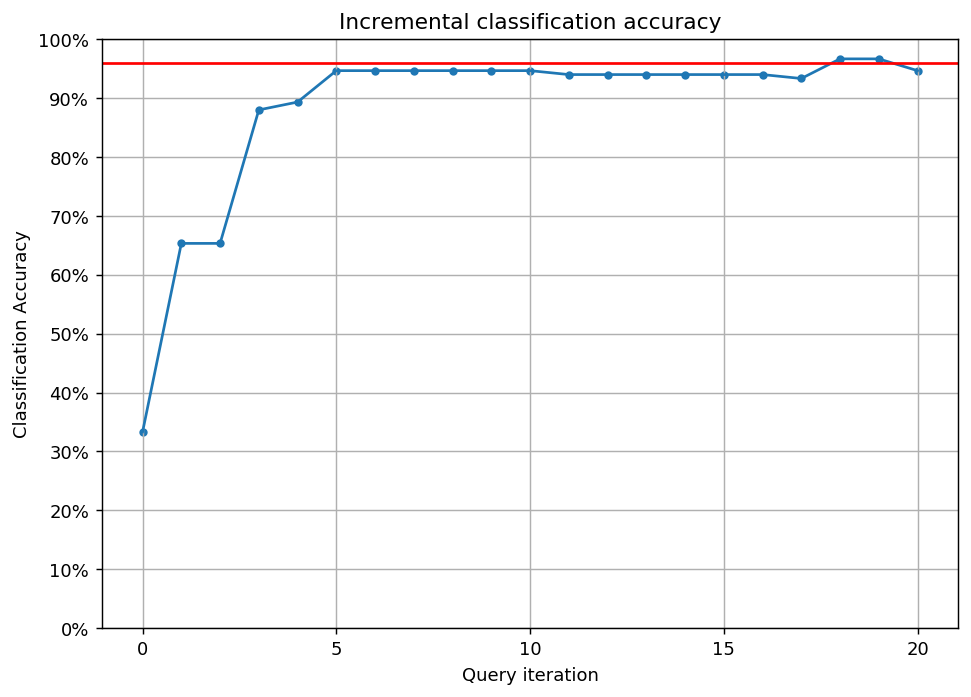

In [101]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(past_performances)
ax.scatter(range(len(past_performances)), past_performances, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)
plt.axhline(y=0.96, color = 'red')

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

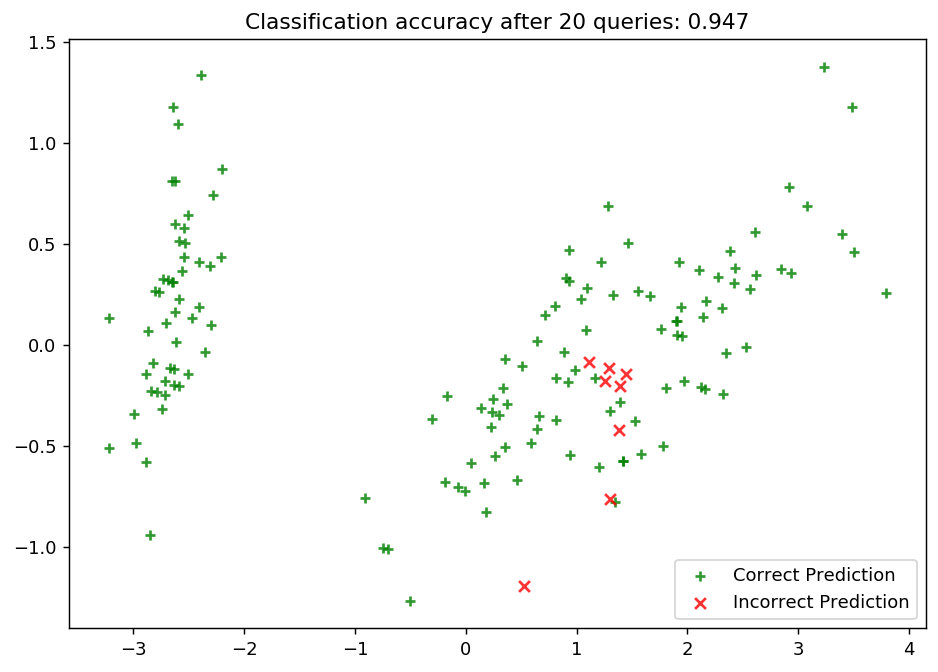

In [100]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(x_pre)
is_correct = (predictions == y_pre)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_c[is_correct],  y=y_c[is_correct],  c='g', marker='+', label='Correct Prediction',   alpha=8/10)
ax.scatter(x=x_c[~is_correct], y=y_c[~is_correct], c='r', marker='x', label='Incorrect Prediction', alpha=8/10)

ax.set_title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=num_of_queries, final_acc=past_performances[-1]))
ax.legend(loc='lower right')

plt.show()